In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
#suffix = 'VR_Collinear_HEMvetos_good_vtx_v8'
suffix = 'VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95'

In [3]:
# Signal
#sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [6]:
# sig_histo / bkg_histo is a dictionary of variables
print(bkg_histo.keys())

dict_keys(['sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_vxy_fromPV1', 'sel_vtx_vxy_fromPV10', 'sel_vtx_vxy_fromPV100', 'sel_vtx_vx1', 'sel_vtx_vx10', 'sel_vtx_vx100', 'sel_vtx_vy1', 'sel_vtx_vy10', 'sel_vtx_vy100', 'sel_vtx_vx_fromPV1', 'sel_vtx_vx_fromPV10', 'sel_vtx_vx_fromPV100', 'sel_vtx_vy_fromPV1', 'sel_vtx_vy_fromPV10', 'sel_vtx_vy_fromPV100', 'sel_vtx_CosThetaColl', 'sel_vtx_CosThetaColl_fromPV', 'sel_vtx_CosThetaColl_fromPV_refit', 'sel_vtx_vxy1_vs_CosThetaColl', 'sel_vtx_vxy10_vs_CosThetaColl', 'sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV', 'sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV', 'sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV_refit', 'sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV_refit', 'CosThetaColl_vs_CosThetaColl_fromPV', 'CosThetaColl_fromPV_vs_CosThetaColl_fromPV_refit', 'PVx', 'PVy', 'sel_vtx_sign', 'sel_vtx_sign_vs_sel_vtx_pt_ratio', 'sel_vtx_sign_vs_CosThetaColl_fromPV_refit', 'sel_vtx_pt_ratio', 'sel_vtx_pt_ratio_vs_CosThetaColl_fro

## Background

In [7]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx cos_collinear_fromPV_refit < 0,Vtx cos_collinear_fromPV_refit > -0.95
SingleTop,0.00023564,0.00000176,0.00000161,0.00000160,0.00000151,0.00000058,0.00000055,0.00000055,0.00000054,0.00000029,0.00000007,0.00000004
DY-M4to50,0.00002646,0.00000030,0.00000029,0.00000029,0.00000028,0.00000015,0.00000015,0.00000015,0.00000014,0.00000007,0.00000002,0.00000001
WJets,0.00101329,0.00000421,0.00000396,0.00000394,0.00000370,0.00000204,0.00000193,0.00000192,0.00000190,0.00000118,0.00000052,0.00000035
TTX,0.00138336,0.00001901,0.00001912,0.00001860,0.00001732,0.00000426,0.00000418,0.00000415,0.00000410,-0.00000050,0.00000082,0.00000111
ZJets,0.00242166,0.00001080,0.00001017,0.00001010,0.00000960,0.00000559,0.00000524,0.00000519,0.00000514,0.00000349,0.00000167,0.00000109
DY-M50,0.00039399,0.00000385,0.00000357,0.00000354,0.00000334,0.00000170,0.00000161,0.00000161,0.00000160,0.00000103,0.00000044,0.00000029
QCD,0.00000248,0.00000003,0.00000001,0.00000001,0.00000001,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Multiboson,0.00065914,0.00000327,0.00000302,0.00000302,0.00000279,0.00000134,0.00000124,0.00000119,0.00000116,0.00000076,0.00000025,0.00000012
ZGamma,0.00032470,0.00000237,0.00000253,0.00000253,0.00000233,0.00000103,0.00000086,0.00000086,0.00000086,0.00000063,0.00000004,0.00000004
TTbar,0.00044365,0.00000572,0.00000531,0.00000528,0.00000505,0.00000181,0.00000170,0.00000167,0.00000166,0.00000105,0.00000040,0.00000025


In [8]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/Cutflow/Efficiency//Background_Efficiency.csv


In [9]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx cos_collinear_fromPV_refit < 0,Vtx cos_collinear_fromPV_refit > -0.95
SingleTop,"3,665.01",27.37,25.03,24.93,23.47,9.10,8.48,8.48,8.40,4.54,1.02,0.65
DY-M4to50,463.63,5.26,5.07,5.06,4.88,2.59,2.57,2.57,2.54,1.26,0.36,0.12
WJets,"214,716.62",892.86,839.60,834.62,784.30,432.38,409.43,406.28,403.29,249.49,109.81,73.18
TTX,440.91,6.06,6.09,5.93,5.52,1.36,1.33,1.32,1.31,-0.16,0.26,0.35
ZJets,"63,747.43",284.39,267.77,265.98,252.79,147.27,137.89,136.72,135.39,91.98,44.04,28.59
DY-M50,"5,356.00",52.36,48.52,48.08,45.46,23.06,21.84,21.82,21.70,14.04,5.95,3.96
QCD,"53,319.99",631.30,286.15,285.91,271.65,67.59,67.59,67.59,66.27,0.00,0.00,0.00
Multiboson,"4,593.86",22.80,21.04,21.04,19.42,9.34,8.61,8.29,8.07,5.26,1.78,0.85
ZGamma,"1,665.25",12.15,12.96,12.96,11.96,5.28,4.42,4.42,4.42,3.21,0.19,0.19
TTbar,"22,073.23",284.84,264.35,262.86,251.43,90.21,84.56,83.33,82.83,52.09,20.03,12.57


In [10]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [11]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx cos_collinear_fromPV_refit < 0,Vtx cos_collinear_fromPV_refit > -0.95
SingleTop,46314,284,266,263,252,97,86,86,84,42,11,6
DY-M4to50,25923,307,287,286,271,147,146,146,141,71,31,11
WJets,1171204,5296,4977,4941,4667,2158,2098,2093,2029,989,460,293
TTX,141391,1805,1677,1664,1599,479,458,445,431,276,111,72
ZJets,729756,4200,3951,3923,3732,2142,2061,2056,2018,1164,535,330
DY-M50,272468,3053,2859,2829,2700,1104,1084,1083,1052,535,230,129
QCD,31603,121,117,116,110,28,28,28,25,0,0,0
Multiboson,24553,139,129,129,121,63,60,59,57,36,14,7
ZGamma,6511,61,59,59,56,31,27,27,27,14,3,3
TTbar,519733,6627,6149,6113,5848,2082,1945,1913,1900,1190,462,287


In [12]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx cos_collinear_fromPV_refit < 0,Vtx cos_collinear_fromPV_refit > -0.95
SingleTop,46314,284,266,263,252,97,86,86,84,42,11,6
DY-M4to50,25923,307,287,286,271,147,146,146,141,71,31,11
WJets,1171204,5296,4977,4941,4667,2158,2098,2093,2029,989,460,293
TTX,141391,1805,1677,1664,1599,479,458,445,431,276,111,72
ZJets,729756,4200,3951,3923,3732,2142,2061,2056,2018,1164,535,330
DY-M50,272468,3053,2859,2829,2700,1104,1084,1083,1052,535,230,129
QCD,31603,121,117,116,110,28,28,28,25,0,0,0
Multiboson,24553,139,129,129,121,63,60,59,57,36,14,7
ZGamma,6511,61,59,59,56,31,27,27,27,14,3,3
TTbar,519733,6627,6149,6113,5848,2082,1945,1913,1900,1190,462,287


In [13]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [14]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 120.47


In [15]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,SingleTop,DY-M4to50,WJets,TTX,ZJets,DY-M50,QCD,Multiboson,ZGamma,TTbar,Total
Weighted Counts,0.65,0.12,73.18,0.35,28.59,3.96,0.00,0.85,0.19,12.57,120.47
Raw Counts,6.00,11.00,293.00,72.00,330.00,129.00,0.00,7.00,3.00,287.00,"1,138.00"


## Data

In [16]:
pd.options.display.float_format = '{:,.1f}'.format
data_cts_df = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
data_cts_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx cos_collinear_fromPV_refit < 0,Vtx cos_collinear_fromPV_refit > -0.95
data_2018_Data_MET_UL18_MET_Run2018D,"364,387.0","2,364.0","1,972.0","1,955.0","1,624.0",627.0,540.0,535.0,530.0,290.0,137.0,80.0
data_2018_Data_MET_UL18_MET_Run2018C,"82,311.0",529.0,457.0,456.0,387.0,143.0,119.0,119.0,116.0,67.0,36.0,23.0
data_2018_Data_MET_UL18_MET_Run2018B,"63,815.0",343.0,315.0,311.0,294.0,116.0,96.0,95.0,93.0,56.0,25.0,17.0
data_2018_Data_MET_UL18_MET_Run2018A,"124,602.0",702.0,649.0,644.0,613.0,219.0,181.0,180.0,176.0,100.0,50.0,26.0
Total,"635,115.0","3,938.0","3,393.0","3,366.0","2,918.0","1,105.0",936.0,929.0,915.0,513.0,248.0,146.0


In [17]:
pd.options.display.float_format = '{:,.1f}'.format

data_composition = pd.DataFrame(data_cts_df[data_cts_df.columns.values[-1]]).transpose()

data_composition = data_composition.rename(index={data_cts_df.columns.values[-1]: 'Data Yield'})
data_composition = data_composition.rename(columns={'data_2018_Data_MET_UL18_MET_Run2018C': 'Run2018C', \
                                                   'data_2018_Data_MET_UL18_MET_Run2018B': 'Run2018B', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018A': 'Run2018A', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018D': 'Run2018D'
                                                   })

data_composition = data_composition.reindex(sorted(data_composition.columns), axis=1)

data_composition

,Run2018A,Run2018B,Run2018C,Run2018D,Total
Data Yield,26.0,17.0,23.0,80.0,146.0


In [18]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections                                         1.7
n(good vertex) > 0                                    1.8
HEM Jet Veto (eta upper bound bug)                    1.9
HEM Jet Veto (additionally veto missing eta region)   1.9
HEM electron Veto                                     1.7
No b-tagged jets                                      1.4
Leading jet |eta| < 2.4                               1.3
Leading jet pT > 80 GeV                               1.3
dPhi(MET,leading jet) > 1.5                           1.2
dPhi(MET,all jets) > 0.75                             1.2
Vtx cos_collinear_fromPV_refit < 0                    1.4
Vtx cos_collinear_fromPV_refit > -0.95                1.2
Name: Total, dtype: float64

In [19]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                                         635,115.0
n(good vertex) > 0                                      3,938.0
HEM Jet Veto (eta upper bound bug)                      3,393.0
HEM Jet Veto (additionally veto missing eta region)     3,366.0
HEM electron Veto                                       2,918.0
No b-tagged jets                                        1,105.0
Leading jet |eta| < 2.4                                   936.0
Leading jet pT > 80 GeV                                   929.0
dPhi(MET,leading jet) > 1.5                               915.0
dPhi(MET,all jets) > 0.75                                 513.0
Vtx cos_collinear_fromPV_refit < 0                        248.0
Vtx cos_collinear_fromPV_refit > -0.95                    146.0
Name: Total, dtype: float64

In [20]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections                                         370,041.9
n(good vertex) > 0                                      2,219.4
HEM Jet Veto (eta upper bound bug)                      1,776.6
HEM Jet Veto (additionally veto missing eta region)     1,767.4
HEM electron Veto                                       1,670.9
No b-tagged jets                                          788.2
Leading jet |eta| < 2.4                                   746.7
Leading jet pT > 80 GeV                                   740.8
dPhi(MET,leading jet) > 1.5                               734.2
dPhi(MET,all jets) > 0.75                                 421.7
Vtx cos_collinear_fromPV_refit < 0                        183.4
Vtx cos_collinear_fromPV_refit > -0.95                    120.5
Name: Total, dtype: float64

/tmp/ipykernel_628076/1904301384.py:17: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


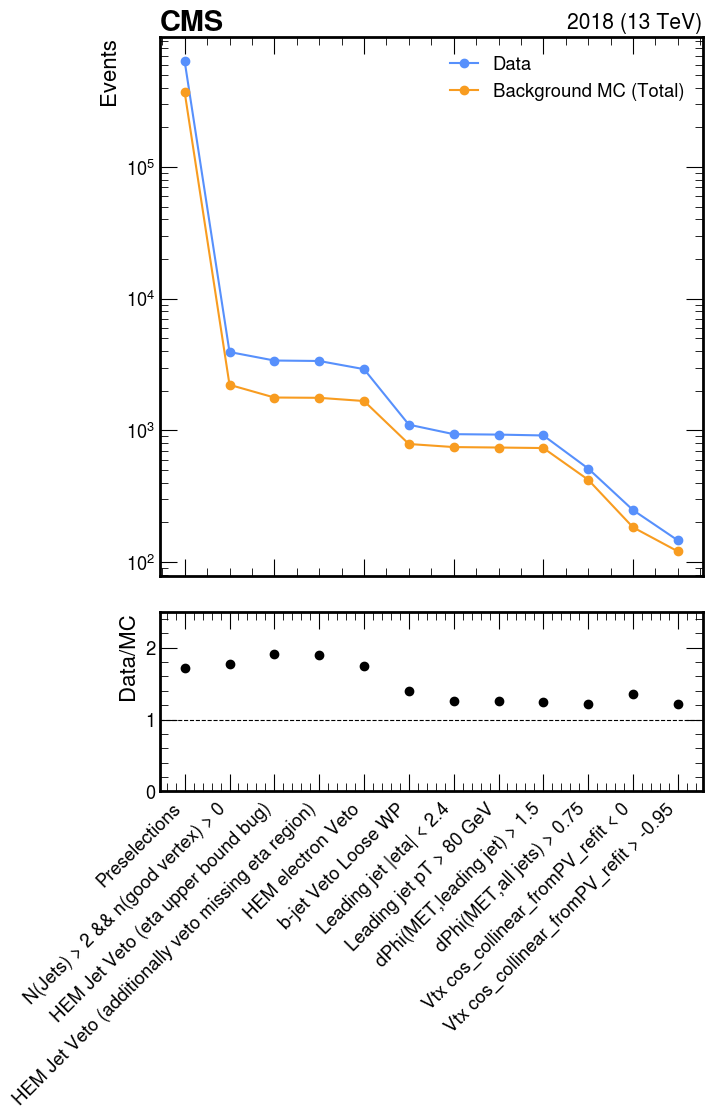

In [21]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')

plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,2.5])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'
cuts[5] = 'b-jet Veto Loose WP'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')



### Plot the efficiency

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/cutflow//Cutflow_background.png


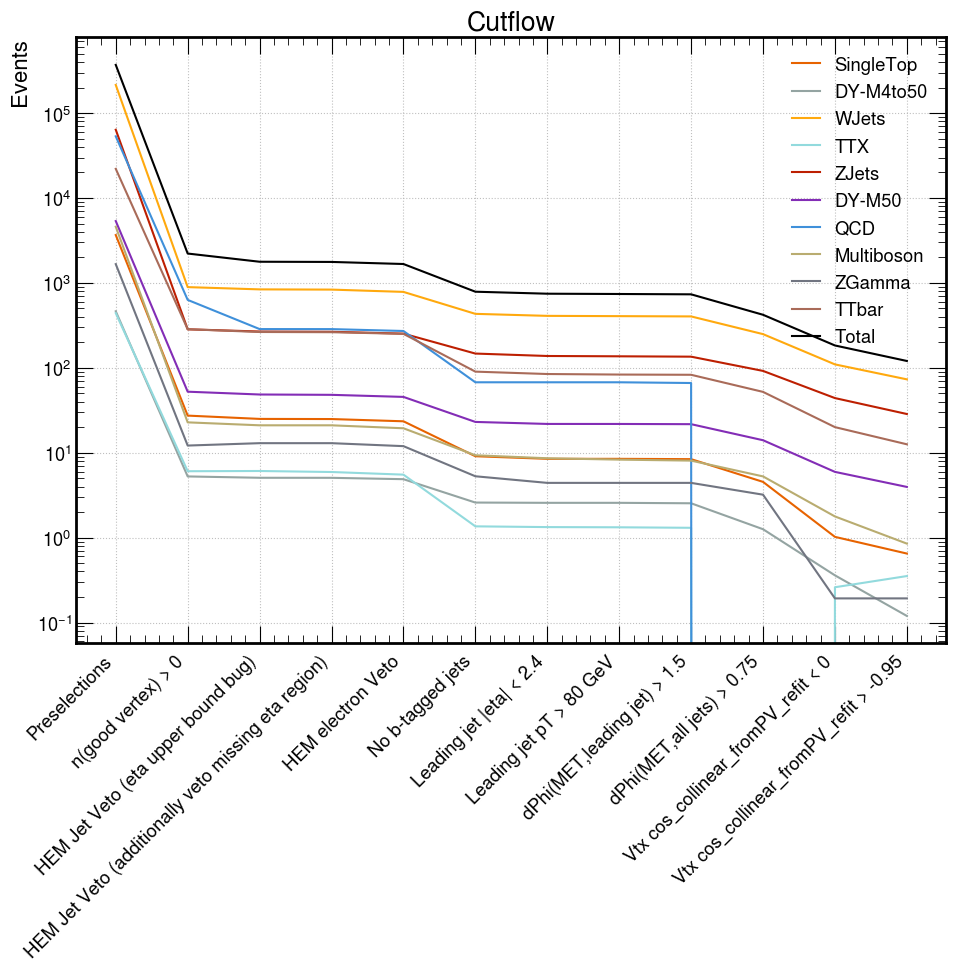

In [22]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

In [23]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                                         635,115.0
n(good vertex) > 0                                      3,938.0
HEM Jet Veto (eta upper bound bug)                      3,393.0
HEM Jet Veto (additionally veto missing eta region)     3,366.0
HEM electron Veto                                       2,918.0
No b-tagged jets                                        1,105.0
Leading jet |eta| < 2.4                                   936.0
Leading jet pT > 80 GeV                                   929.0
dPhi(MET,leading jet) > 1.5                               915.0
dPhi(MET,all jets) > 0.75                                 513.0
Vtx cos_collinear_fromPV_refit < 0                        248.0
Vtx cos_collinear_fromPV_refit > -0.95                    146.0
Name: Total, dtype: float64

In [24]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx cos_collinear_fromPV_refit < 0,Vtx cos_collinear_fromPV_refit > -0.95
SingleTop,"3,665.0",27.4,25.0,24.9,23.5,9.1,8.5,8.5,8.4,4.5,1.0,0.6
DY-M4to50,463.6,5.3,5.1,5.1,4.9,2.6,2.6,2.6,2.5,1.3,0.4,0.1
WJets,"214,716.6",892.9,839.6,834.6,784.3,432.4,409.4,406.3,403.3,249.5,109.8,73.2
TTX,440.9,6.1,6.1,5.9,5.5,1.4,1.3,1.3,1.3,-0.2,0.3,0.4
ZJets,"63,747.4",284.4,267.8,266.0,252.8,147.3,137.9,136.7,135.4,92.0,44.0,28.6
DY-M50,"5,356.0",52.4,48.5,48.1,45.5,23.1,21.8,21.8,21.7,14.0,6.0,4.0
QCD,"53,320.0",631.3,286.1,285.9,271.7,67.6,67.6,67.6,66.3,0.0,0.0,0.0
Multiboson,"4,593.9",22.8,21.0,21.0,19.4,9.3,8.6,8.3,8.1,5.3,1.8,0.9
ZGamma,"1,665.3",12.2,13.0,13.0,12.0,5.3,4.4,4.4,4.4,3.2,0.2,0.2
TTbar,"22,073.2",284.8,264.4,262.9,251.4,90.2,84.6,83.3,82.8,52.1,20.0,12.6


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/cutflow//Cutflow_background.png


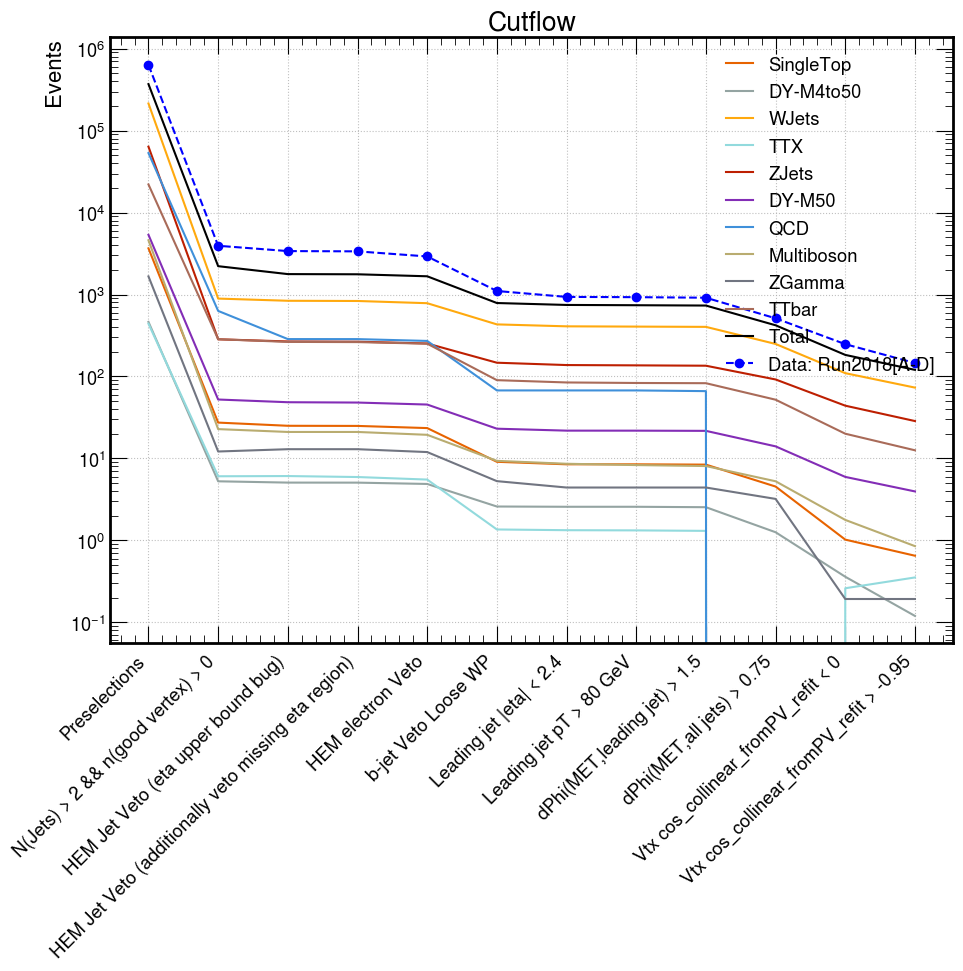

In [25]:
cmap = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"] # cms-recommended
bkg_cmap = {
    "QCD": cmap[0],
    "WJets": cmap[1],
    "ZJets": cmap[2],
    "DY-M4to50": cmap[3],
    "DY-M50": cmap[4],
    "TTbar": cmap[5],
    "SingleTop": cmap[6],
    "Multiboson": cmap[7],
    "ZGamma": cmap[8],
    "TTX": cmap[9]
}

df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
processes = df.index.values.tolist()

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'
cuts[5] = 'b-jet Veto Loose WP'

# Color map for each process
for process in processes:
    if 'Total' in process:
        plt.plot(cuts, df.loc[process], label=process, color='black')
    else:
        plt.plot(cuts, df.loc[process], label=process, color = bkg_cmap[process])

# plot data
df_data = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
plt.plot(cuts, df_data.loc['Total'], label='Data: Run2018[A-D]', color = 'blue', marker='o', linestyle='--')

if plot_dict_bkg_eff['doLog']:
    plt.yscale('log')

if plot_dict_bkg_eff['ylim'] != None:
    plt.ylim(plot_dict_bkg_eff['ylim'][0], plot_dict_bkg_eff['ylim'][1])
    
plt.grid()
    
plt.ylabel(plot_dict_bkg_eff['ylabel'])
plt.title(plot_dict_bkg_eff['title'])
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
plt.legend(loc='upper right')
    
if plot_dict_bkg_eff['doSave']:
    os.makedirs(plot_dict_bkg_eff['outDir'], exist_ok=True)
    plt.tight_layout()
    plt.savefig(f"{plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    print(f"Saved: {plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    
plt.show()